# Datathon Mayo 2018  **_"Haciendo el gasto fiscal visible para el público"_**
## Gasto Neto Mensualizado por año de las Instituciones Públicas

## Lectura de Datos

In [1]:
import os
import pandas as pd
import pandas_profiling as pd_profiling
import altair as alt
import matplotlib.pyplot as plt
#%matplotlib ipympl

In [2]:
def read_field_type(x):
    '''
    Para facilitar la lectura de los dataframes con los tipos de columna correspondientes.
    '''
    if x in ['String']:
        return str
    elif x in ['Integer', 'Long']:
        return int
    else:
        return str

In [3]:
pub_spend_names = pd.read_csv(os.path.join('data', 
                         'Core_Dataset_1_monthly_spend_2009-2017', 
                         'dataset_1_monthly_spend_2009-2017_DICTIONARY.csv'), 
            sep=';')

In [4]:
pub_spend_names

Field name Field type  Field size Field format  \
0               Periodo    Integer          15            #   
1        Nombre Partida     String          63          NaN   
2       Nombre Capitulo     String          78          NaN   
3       Nombre Programa     String          78          NaN   
4      Nombre Subtitulo     String          37          NaN   
5           Nombre Item     String          54          NaN   
6     Nombre Asignación     String         250          NaN   
7  Nombre SubAsignación     String          80          NaN   
8                   Mes     String          10          NaN   
9                 Monto    Integer          15            #   

                      Range  \
0              2009 to 2017   
1             28 categories   
2            219 categories   
3            363 categories   
4             10 categories   
5             43 categories   
6           4372 categories   
7           1355 categories   
8             12 categories   
9  (-49702217) to 357607483   

                                         Description  \
0                                  Year of the spend   
1                                        Ministeries   
2                                    Public Services   
3                                           Programs   
4           First level of the budget classification   
5          Second level of the budget classification   
6           Third level of the budget classification   
7            Last level of the budget classification   
8                                              Month   
9  Amount, this data was update by the inflation ...   

                                 Example  
0                                   2009  
1                Ministerio de Educación  
2                Fondo Nacional de Salud  
3                Fondo Nacional de Salud  
4              TRANSFERENCIAS CORRIENTES  
5                      Al Sector Privado  
6  Subsidios Fondo Solidario de Vivienda  
7                     Asistencia Técnica  
8                                  enero  
9                              357607483

In [23]:
pub_spend = pd.read_csv(os.path.join('data', 
                              'Core_Dataset_1_monthly_spend_2009-2017',
                              'dataset_1_monthly_spend_2009-2017.csv'),
                 sep=';', 
                 encoding='latin-1',
                 dtype=dict(zip(pub_spend_names['Field name'], pub_spend_names['Field type'].apply(read_field_type))))

In [24]:
pub_spend.head(5) 

Periodo     Nombre Partida          Nombre Capitulo  \
0     2009  Congreso Nacional  Biblioteca Del Congreso   
1     2009  Congreso Nacional  Biblioteca Del Congreso   
2     2009  Congreso Nacional  Biblioteca Del Congreso   
3     2009  Congreso Nacional  Biblioteca Del Congreso   
4     2009  Congreso Nacional  Biblioteca Del Congreso   

           Nombre Programa           Nombre Subtitulo Nombre Item  \
0  Biblioteca Del Congreso  INICIATIVAS DE INVERSIÃN   Proyectos   
1  Biblioteca Del Congreso  INICIATIVAS DE INVERSIÃN   Proyectos   
2  Biblioteca Del Congreso  INICIATIVAS DE INVERSIÃN   Proyectos   
3  Biblioteca Del Congreso  INICIATIVAS DE INVERSIÃN   Proyectos   
4  Biblioteca Del Congreso  INICIATIVAS DE INVERSIÃN   Proyectos   

       Nombre AsignaciÃ³n Nombre SubAsignaciÃ³n        Mes  Monto_sum  
0  Gastos Administrativos                   NaN      Abril          0  
1  Gastos Administrativos                   NaN     Agosto          0  
2  Gastos Administrativos                   NaN  Diciembre          0  
3  Gastos Administrativos                   NaN      Enero          0  
4  Gastos Administrativos                   NaN    Febrero          0

In [9]:
for col in pub_spend:
    print('Column: {}\n'.format(col))
    for element in pub_spend[col].unique():
        print(element)
    print('ņ')

Column: Periodo

2009
2010
2011
2012
2013
2014
2015
2016
2017
ņ
Column: Nombre Partida

Congreso Nacional
ContralorÃ­a General De La RepÃºblica
Ministerio De Agricultura
Ministerio De Bienes Nacionales
Ministerio De Defensa Nacional
Ministerio De Desarrollo Social
Ministerio De EconomÃ­a, Fomento Y Turismo
Ministerio De EducaciÃ³n
Ministerio De Hacienda
Ministerio De Justicia Y Derechos Humanos
Ministerio De MinerÃ­a
Ministerio De Obras PÃºblicas
Ministerio De Relaciones Exteriores
Ministerio De Salud
Ministerio De Transportes Y Telecomunicaciones
Ministerio De Vivienda Y Urbanismo
Ministerio Del Interior Y Seguridad PÃºblica
Ministerio PÃºblico
Ministerio SecretarÃ­a General De Gobierno
Ministerio SecretarÃ­a General De La Presidencia De La RepÃºblica
Poder Judicial
Presidencia De La RepÃºblica
Tesoro PÃºblico
Ministerio Del Medio Ambiente
Ministerio Del Trabajo Y PrevisiÃ³n Social
Ministerio De EnergÃ­a
Ministerio Del Deporte
Ministerio De La Mujer Y La Equidad De GÃ©nero
Servicio El

In [29]:
congreso = pub_spend[pub_spend['Nombre Partida'] == 'Congreso Nacional']

In [30]:
congreso.head()

Periodo     Nombre Partida          Nombre Capitulo  \
0     2009  Congreso Nacional  Biblioteca Del Congreso   
1     2009  Congreso Nacional  Biblioteca Del Congreso   
2     2009  Congreso Nacional  Biblioteca Del Congreso   
3     2009  Congreso Nacional  Biblioteca Del Congreso   
4     2009  Congreso Nacional  Biblioteca Del Congreso   

           Nombre Programa           Nombre Subtitulo Nombre Item  \
0  Biblioteca Del Congreso  INICIATIVAS DE INVERSIÃN   Proyectos   
1  Biblioteca Del Congreso  INICIATIVAS DE INVERSIÃN   Proyectos   
2  Biblioteca Del Congreso  INICIATIVAS DE INVERSIÃN   Proyectos   
3  Biblioteca Del Congreso  INICIATIVAS DE INVERSIÃN   Proyectos   
4  Biblioteca Del Congreso  INICIATIVAS DE INVERSIÃN   Proyectos   

       Nombre AsignaciÃ³n Nombre SubAsignaciÃ³n        Mes  Monto_sum  
0  Gastos Administrativos                   NaN      Abril          0  
1  Gastos Administrativos                   NaN     Agosto          0  
2  Gastos Administrativos                   NaN  Diciembre          0  
3  Gastos Administrativos                   NaN      Enero          0  
4  Gastos Administrativos                   NaN    Febrero          0

Gasto por año para los distintos servicios públicos del Congreso Nacional por cada mes

In [33]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

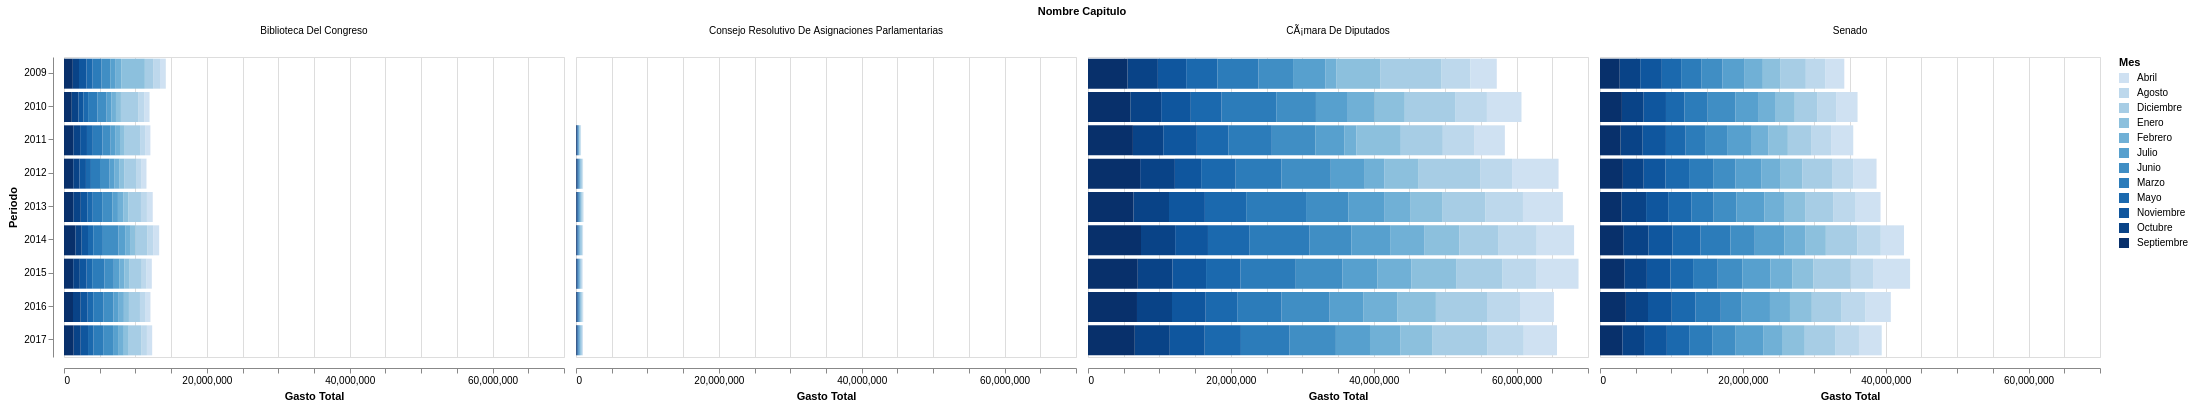

In [41]:
alt.Chart(congreso).mark_bar().encode(
    x=alt.X('sum(Monto_sum):Q', axis=alt.Axis(title='Gasto Total')),
    y='Periodo:O',
    column='Nombre Capitulo:O',
    color='Mes:O'
).properties(
    height=300,
    width=500
)

In [42]:
import calendar


In [43]:
{v: k for k,v in enumerate(calendar.month_abbr)}

{'': 0,
 'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}